# Library

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, plot_confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

# Dataset

In [2]:
df = pd.read_csv("../Models/data_tofit.csv")
df

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,SS,Amphet,Amyl,Benzos,Cannabis,Heroin,Ketamine,LSD,Meth,VSA,Addiction
0,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-1.18084,1,0,1,0,0,0,0,0,0,No Addiction
1,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.21575,1,1,0,1,0,1,1,1,0,Addiction without psychologic effect
2,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,0.40148,0,0,0,1,0,0,0,0,0,No Addiction
3,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.18084,0,0,1,1,0,1,0,0,0,No Addiction
4,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21575,0,0,0,1,0,0,0,0,0,No Addiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,1.92173,0,0,0,1,0,0,1,0,1,Addiction without psychologic effect
1881,-0.95197,-0.48246,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.76540,0,0,0,1,0,0,1,1,0,Addiction without psychologic effect
1882,-0.07854,0.48246,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,-0.52593,1,1,1,1,0,1,1,0,0,Addiction with psychologic effect
1883,-0.95197,0.48246,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.22470,0,0,0,1,0,0,1,0,0,Addiction with psychologic effect


# Test/train

In [3]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(df.drop("Addiction", axis = 1), df["Addiction"], test_size=0.35, random_state = 42,\
                                                   stratify = df["Addiction"])

# Gradient Boosting Model

In [4]:
param = {"learning_rate": [0.01,0.1,1, 2, 5],
        'n_estimators': [100, 500, 1000],
        'max_depth': range(1,5),
        "max_features": ["auto", "sqrt", "log2"]}
        #"ccp_alpha":[0.001,0.01,0.1,1,10]}

In [5]:
GradientBoost_Grid = GridSearchCV(GradientBoostingClassifier(), param, cv= KFold(n_splits=5, random_state=42, shuffle = True),scoring = "accuracy")
GradientBoost_Grid.fit(X_train, y_train)
GradientBoost_Grid

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 2, 5],
                         'max_depth': range(1, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [6]:
print("Best parameters {} with best score {} ".format(GradientBoost_Grid.best_params_,\
GradientBoost_Grid.best_score_))

Best parameters {'learning_rate': 0.1, 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 1000} with best score 0.9338775510204081 


In [7]:
# Testing model
y_pred = GradientBoost_Grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [8]:
cross = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'], margins=True)
cross

Predicted,Addiction with psychologic effect,Addiction without psychologic effect,No Addiction,All
Real,,,,
Addiction with psychologic effect,170,8,5,183
Addiction without psychologic effect,15,161,3,179
No Addiction,5,8,285,298
All,190,177,293,660


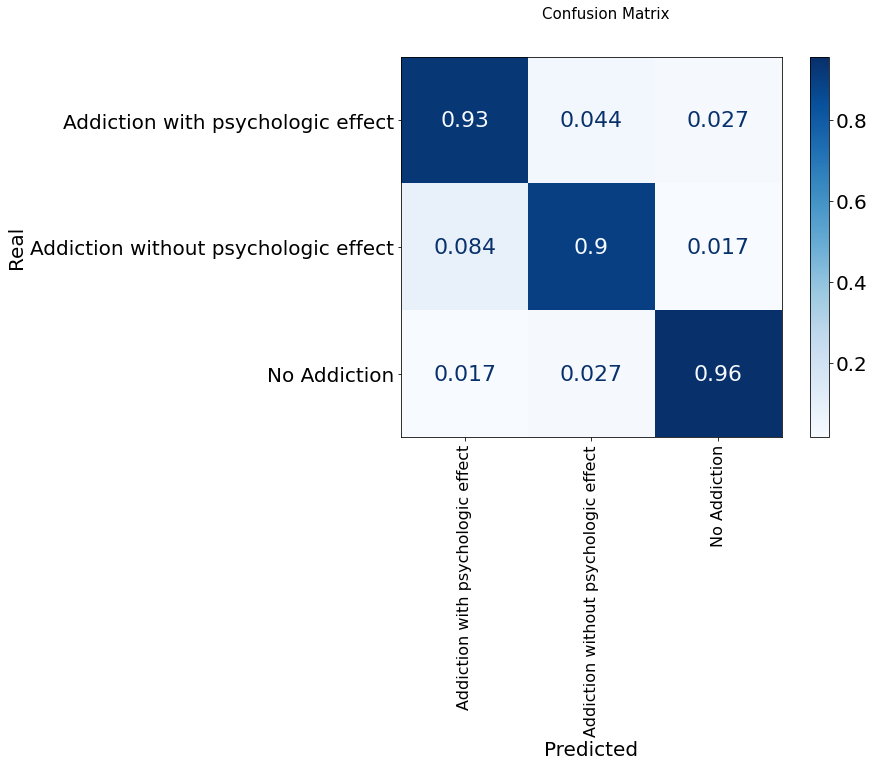

In [9]:
# Confusion Matrix

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(10,7))
fig.suptitle('Confusion Matrix', fontsize=15)
plot_confusion_matrix(GradientBoost_Grid, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted')
plt.xticks(rotation =90)
plt.ylabel('Real')
plt.show() 

In [11]:
# Importance Featuring

importance = pd.DataFrame(data=GradientBoost_Grid.best_estimator_.feature_importances_, columns = ['Value'],\
index=X_test.columns).reset_index().rename(columns={'index':'Variable'}).sort_values('Value').reset_index(drop=True)
importance['%'] = importance['Value']*100
importance

,Variable,Value,%
0,Heroin,0.000016,0.001599
1,Meth,0.000764,0.076401
2,Amyl,0.001181,0.118057
3,Benzos,0.003654,0.365354
4,Gender,0.004143,0.414255
5,VSA,0.004365,0.436497
6,Ketamine,0.004662,0.466200
7,Ascore,0.017219,1.721902
8,Education,0.022160,2.216035
9,Age,0.031076,3.107565


<BarContainer object of 18 artists>

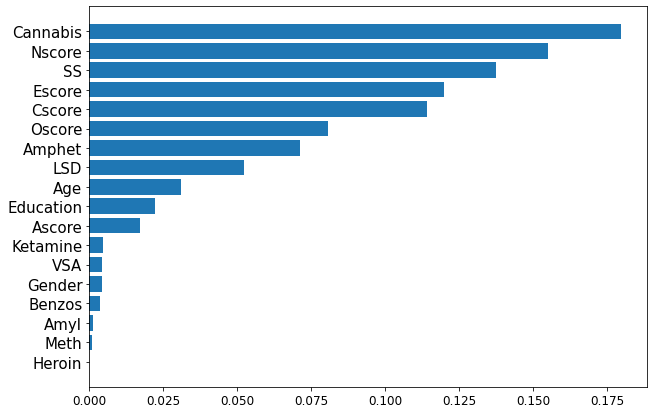

In [12]:
# Model importance
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,7))
plt.barh(importance['Variable'], importance['Value'])

We can Remove Amyl, Benzos, Heroin

## Removing features

In [13]:
# Split train test
df_important = df.drop(["Amyl", "Meth","Heroin"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_important.drop("Addiction", axis = 1), df_important["Addiction"], test_size=0.35, random_state = 42,\
                                                   stratify = df_important["Addiction"])

In [15]:
GradientBoost_Grid = GridSearchCV(GradientBoostingClassifier(), param, cv= KFold(n_splits=5, random_state=42, shuffle = True),scoring = "accuracy")
GradientBoost_Grid.fit(X_train, y_train)
GradientBoost_Grid

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 2, 5],
                         'max_depth': range(1, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [17]:
print("Best parameters {} with best score {} ".format(GradientBoost_Grid.best_params_,\
GradientBoost_Grid.best_score_))

Best parameters {'learning_rate': 0.1, 'max_depth': 1, 'max_features': 'auto', 'n_estimators': 1000} with best score 0.929795918367347 


In [27]:
# get the grid search results
results = pd.DataFrame(GradientBoost_Grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.277662,0.010368,0.002601,4.900377e-04,0.01,1,auto,100,"{'learning_rate': 0.01, 'max_depth': 1, 'max_f...",0.800000,0.832653,0.763265,0.726531,0.783673,0.781224,0.035545,106
1,1.348902,0.020891,0.004001,1.907349e-07,0.01,1,auto,500,"{'learning_rate': 0.01, 'max_depth': 1, 'max_f...",0.881633,0.885714,0.853061,0.857143,0.857143,0.866939,0.013805,98
2,2.707407,0.027923,0.005801,4.001856e-04,0.01,1,auto,1000,"{'learning_rate': 0.01, 'max_depth': 1, 'max_f...",0.930612,0.902041,0.889796,0.877551,0.889796,0.897959,0.018070,84
3,0.208246,0.007835,0.002601,4.898820e-04,0.01,1,sqrt,100,"{'learning_rate': 0.01, 'max_depth': 1, 'max_f...",0.787755,0.812245,0.722449,0.673469,0.738776,0.746939,0.048980,107
4,1.024230,0.035516,0.004201,4.001618e-04,0.01,1,sqrt,500,"{'learning_rate': 0.01, 'max_depth': 1, 'max_f...",0.885714,0.881633,0.861224,0.853061,0.873469,0.871020,0.012272,96


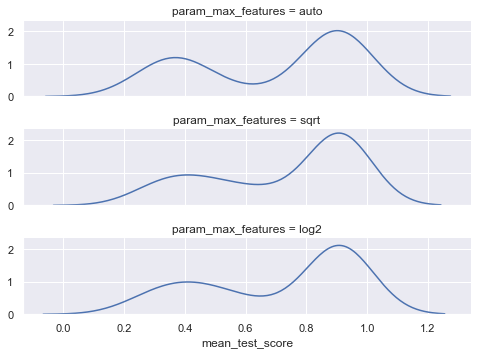

In [34]:
#Looking features scores
g = sns.FacetGrid(results, row="param_max_features",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "mean_test_score")

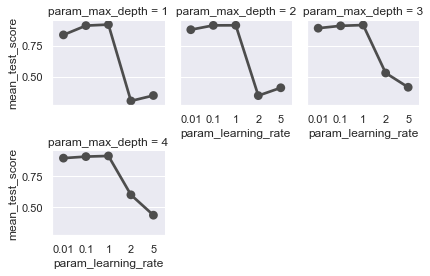

In [35]:
#Comparing scores by max depth and min samples
sns.set()
g = sns.FacetGrid(results, col="param_max_depth", col_wrap=3, height=2)
g.map(sns.pointplot, "param_learning_rate", "mean_test_score", order= [0.01,0.1,1, 2, 5], color=".3", ci=None)

# Testing model

In [18]:
# Testing model
y_pred = GradientBoost_Grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [19]:
cross = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'], margins=True)
cross

Predicted,Addiction with psychologic effect,Addiction without psychologic effect,No Addiction,All
Real,,,,
Addiction with psychologic effect,170,8,5,183
Addiction without psychologic effect,15,160,4,179
No Addiction,7,5,286,298
All,192,173,295,660


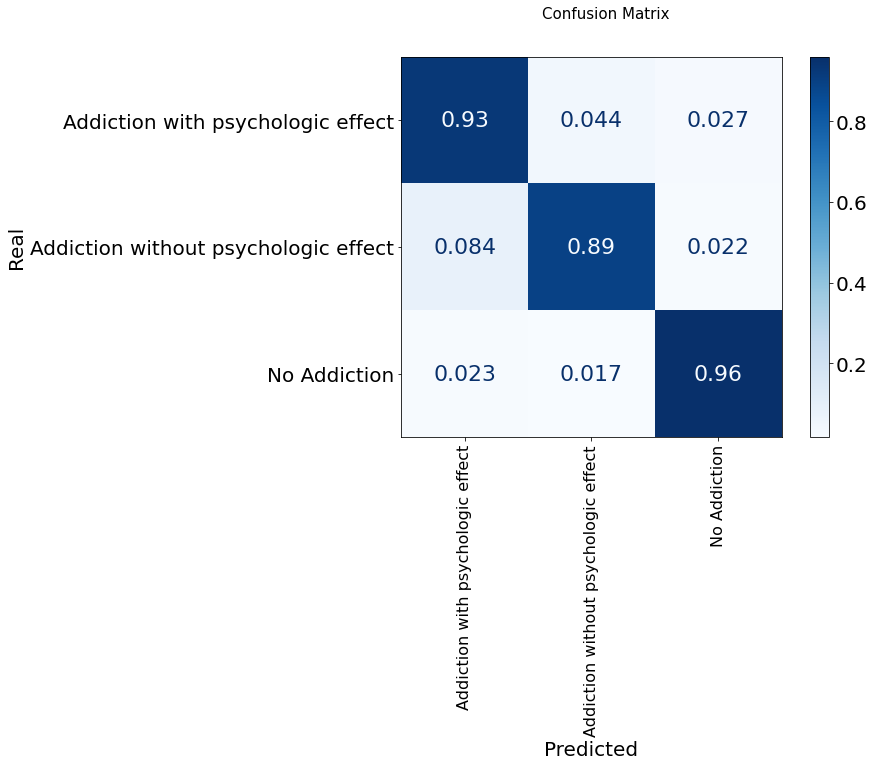

In [23]:
# Confusion Matrix

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(10,7))
fig.suptitle('Confusion Matrix', fontsize=15)
plot_confusion_matrix(GradientBoost_Grid, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted')
plt.xticks(rotation =90)
plt.ylabel('Real')
plt.show() 

In [24]:
# Importance Featuring

importance = pd.DataFrame(data=GradientBoost_Grid.best_estimator_.feature_importances_, columns = ['Value'],\
index=X_test.columns).reset_index().rename(columns={'index':'Variable'}).sort_values('Value').reset_index(drop=True)
importance['%'] = importance['Value']*100
importance

,Variable,Value,%
0,Benzos,0.003834,0.383398
1,Gender,0.004316,0.431613
2,VSA,0.004453,0.445318
3,Ketamine,0.004749,0.474942
4,Ascore,0.016994,1.699363
5,Education,0.022265,2.226516
6,Age,0.031233,3.123265
7,LSD,0.052402,5.240218
8,Amphet,0.071414,7.141396
9,Oscore,0.080758,8.075847


<BarContainer object of 15 artists>

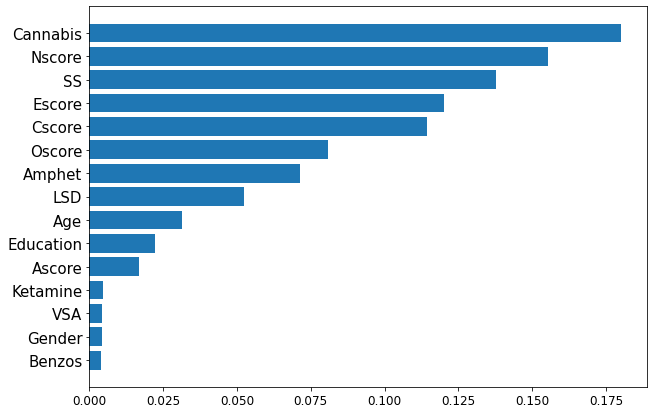

In [25]:
# Model importance
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,7))
plt.barh(importance['Variable'], importance['Value'])

Removing features, doesn't improve the model we can stop here